In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import Library as lb
from filterpy.common import Q_discrete_white_noise
import tensorflow as tf
from tensorflow import keras

Prey - Predator clasic

Text(0.5, 0, 'Prey [-]')

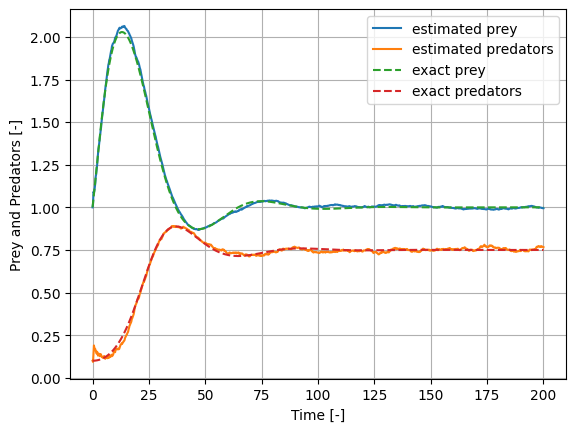

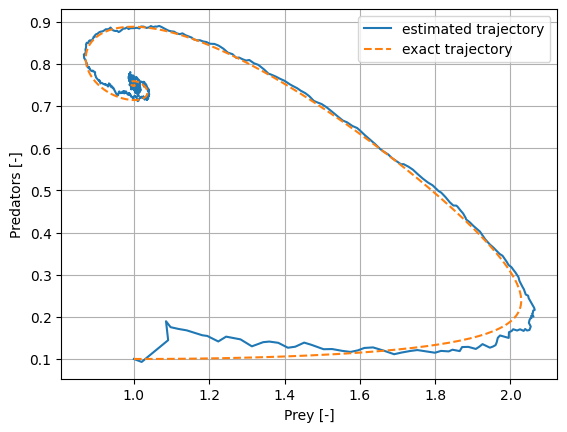

In [2]:
T = 200
Nt = 1000
dt = T/Nt
x0 = 1
y0 = 0.1
rho = 0.1
alpha = 0.25
beta = 0.2
gamma = 0.1
delta = 0.1

# Define the measurament function
def hx(x):
   return np.array([x[0], x[1]])

# Define the transition function
def fx(x, dt):
    F = np.array([[1 + alpha*dt - beta*dt*x[1] -rho*dt*x[0],                             0],
                  [0,                                           1-gamma*dt + delta*dt*x[0]]])
    return np.dot(F, x)

# Assign the initial x array
x = np.array([x0, y0])

# Define the covariance matrix
P = np.eye(2)
# Define the measurament noise
R = np.eye(2)
# Define the process noise
Q = Q_discrete_white_noise(dim=2, dt=dt, var=.01)

# Exact solution
x_ex = np.zeros((Nt+1,2))
tt=np.arange(0,T+dt,dt)
for i,t in enumerate(tt):
    if i==0:
        x_ex[i,:] = np.array([x0,y0])
    else:
        x_ex[i,0] = x_ex[i-1,0] + dt*x_ex[i-1,0]*(alpha-beta*x_ex[i-1,1]-rho*x_ex[i-1,0])
        x_ex[i,1] = x_ex[i-1,1] + dt*x_ex[i-1,1]*(-gamma+delta*x_ex[i-1,0])

# Define the data acquisition function
def get_sensor_reading(t):
    i = np.int32(t/dt)
    return x_ex[i,:]

# Create the model from library
f = lb.EnKF(dim_x=2, dim_z=2, f=fx, h=hx, get_data=get_sensor_reading, dt=dt, t0=0)
f.create_model(x0=np.array([x0, y0]), P=P, R=R, Q=Q, N=100)

# Predict/Update loop
x_hat = f.loop(T)

plt.figure()
plt.grid(True)
plt.plot(tt,x_hat[:,0], label='estimated prey')
plt.plot(tt,x_hat[:,1], label='estimated predators')
plt.plot(tt,x_ex[:,0], label='exact prey', linestyle='--')
plt.plot(tt,x_ex[:,1], label='exact predators', linestyle='--')
plt.legend()
plt.ylabel('Prey and Predators [-]')
plt.xlabel('Time [-]')

plt.figure()
plt.grid(True)
plt.plot(x_hat[:,0],x_hat[:,1], label='estimated trajectory')
plt.plot(x_ex[:,0],x_ex[:,1], label='exact trajectory', linestyle='--')
plt.legend()
plt.ylabel('Predators [-]')
plt.xlabel('Prey [-]')

Esempio con Stato parametro

In [3]:
T = 200
Nt = 1000
dt = T/Nt
x0 = 1
y0 = 0.1
rho = 0.1
alpha = 0.25
beta = 0.2
gamma = 0.1
delta = 0.1

# Define the measurament function
def hx(x):
   return np.array([x[0], x[1]])

# Define the transition function
def fx(x, dt):
    F = np.array([[1 + x[2]*dt - beta*dt*x[1] -rho*dt*x[0],                             0,                  0],
                  [0,                                           1-gamma*dt + delta*dt*x[0],                 0],
                  [0,                                                                   0,                  1]])
    return np.dot(F, x)

# Assign the initial x array
x = np.array([x0, y0, 0.25])

# Define the covariance matrix
P = np.eye(3)
# Define the measurament noise
R = np.eye(2)
# Define the process noise
Q = Q_discrete_white_noise(dim=3, dt=dt, var=.00)

# Exact solution
x_ex = np.zeros((Nt+1,2))
tt=np.arange(0,T+dt,dt)
for i,t in enumerate(tt):
    if i==0:
        x_ex[i,:] = np.array([x0,y0])
    else:
        x_ex[i,0] = x_ex[i-1,0] + dt*x_ex[i-1,0]*(alpha-beta*x_ex[i-1,1]-rho*x_ex[i-1,0])
        x_ex[i,1] = x_ex[i-1,1] + dt*x_ex[i-1,1]*(-gamma+delta*x_ex[i-1,0])

# Define the data acquisition function
def get_sensor_reading(t):
    i = np.int32(t/dt)
    return x_ex[i,:]

# Create the model from library
f = lb.EnKF(dim_x=3, dim_z=2, f=fx, h=hx, get_data=get_sensor_reading, dt=dt, t0=0)
f.create_model(x0=x, P=P, R=R, Q=Q, N=500)

# Predict/Update loop
x_hat = f.loop(T)

plt.figure()
plt.grid(True)
plt.plot(tt,x_hat[:,0], label='estimated prey')
plt.plot(tt,x_hat[:,1], label='estimated predators')
plt.plot(tt,x_ex[:,0], label='exact prey', linestyle='--')
plt.plot(tt,x_ex[:,1], label='exact predators', linestyle='--')
plt.legend()
plt.ylabel('Prey and Predators [-]')
plt.xlabel('Time [-]')

plt.figure()
plt.grid(True)
plt.plot(x_hat[:,0],x_hat[:,1], label='estimated trajectory')
plt.plot(x_ex[:,0],x_ex[:,1], label='exact trajectory', linestyle='--')
plt.legend()
plt.ylabel('Predators [-]')
plt.xlabel('Prey [-]')

plt.figure()
plt.grid(True)
plt.plot(tt,x_hat[:,2], label='estimated alpha')
plt.axhline(alpha, xmin=0, xmax=tt[-1], label='exact alpha', linestyle='--')
plt.legend()
plt.ylabel('Alpha coefficient [-]')
plt.xlabel('Time [-]')

KeyboardInterrupt: 

Esempio con NN su Prey Predator

In [ ]:
# Surrogate model

T = 200
Nt = 200
dt = T/Nt
x0 = 1
y0 = 0.1
rho = 0.1
alpha = 0.25
beta = 0.2
gamma = 0.1
delta = 0.1

# Define the measurament function
def hx(x):
   return np.array([x[0], x[1]])

# Define the transition function
NN=keras.models.load_model('../data/Prey_Predator/model_NN.h5', compile=False)
def fxx(x, dt):
    x_ = np.empty((1,2,))
    x_[0,:] = x
    return NN(x_)

# Assign the initial x array
x = np.array([x0, y0])

# Define the covariance matrix
P = np.eye(2)
# Define the measurament noise
R = np.eye(2)
# Define the process noise
Q = Q_discrete_white_noise(dim=2, dt=dt, var=.01)

# Exact solution
x_ex = np.zeros((Nt+1,2))
tt=np.arange(0,T+dt,dt)
for i,t in enumerate(tt):
    if i==0:
        x_ex[i,:] = np.array([x0,y0])
    else:
        x_ex[i,0] = x_ex[i-1,0] + dt*x_ex[i-1,0]*(alpha-beta*x_ex[i-1,1]-rho*x_ex[i-1,0])
        x_ex[i,1] = x_ex[i-1,1] + dt*x_ex[i-1,1]*(-gamma+delta*x_ex[i-1,0])

# Define the data acquisition function
def get_sensor_reading(t):
    i = np.int32(t/dt)
    return x_ex[i,:]

# Create the model from library
f = lb.EnKF(dim_x=2, dim_z=2, f=fxx, h=hx, get_data=get_sensor_reading, dt=dt, t0=0)
f.create_model(x0=np.array([x0, y0]), P=P, R=R, Q=Q, N=100)

# Predict/Update loop
x_hat = f.loop(T, verbose=True)

plt.figure()
plt.grid(True)
plt.plot(tt,x_hat[:,0], label='estimated prey')
plt.plot(tt,x_hat[:,1], label='estimated predators')
plt.plot(tt,x_ex[:,0], label='exact prey', linestyle='--')
plt.plot(tt,x_ex[:,1], label='exact predators', linestyle='--')
plt.legend()
plt.ylabel('Prey and Predators [-]')
plt.xlabel('Time [-]')

plt.figure()
plt.grid(True)
plt.plot(x_hat[:,0],x_hat[:,1], label='estimated trajectory')
plt.plot(x_ex[:,0],x_ex[:,1], label='exact trajectory', linestyle='--')
plt.legend()
plt.ylabel('Predators [-]')
plt.xlabel('Prey [-]')

Prova creazione FNO con libreria

In [44]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.01,    #0.05               best with 0.001
  decay_steps=100, #100        best with 100
  decay_rate=1, #1              best with 1
  staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=500, min_delta=0.0001),
        ]

def compile_and_fit(model, name, x_train, y_train, x_test, y_test, optimizer=None, max_epochs=1000):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[
                  tf.keras.losses.MeanSquaredError("auto", "mean_squared_error"),
                  'accuracy'])

    model.summary()

    history = model.fit(
            x_train, y_train,
            epochs=max_epochs,
            validation_data=(x_test, y_test),
            callbacks=get_callbacks(name),
            verbose=2)

    return history


#Training data set
folder = 'Burgers_time'

input_train=np.load('../data/' + folder + '/input_train.npy')
input_test=np.load('../data/' + folder + '/input_test.npy')
output_train=np.load('../data/' + folder + '/output_train.npy')
output_test=np.load('../data/' + folder + '/output_test.npy')

# For Burgers
# INPUTDIM = (input_train.shape[1],)
# OUTPUTDIM = (output_train.shape[1],)

# For Darcy
INPUTDIM = (input_train.shape[1],input_train.shape[2])
OUTPUTDIM = (output_train.shape[1],output_train.shape[2])


model = lb.FNO2D(INPUTDIM, OUTPUTDIM, p_dim=48, n=12, k_max=7, verbose=True, model_name='Darcy_FNO', dropout=0.1, kernel_reg=0.02)
history = compile_and_fit(model, model.name, x_train=input_train, y_train=output_train, x_test=input_test, y_test=output_test, optimizer=None, max_epochs=5000)



Creating Fourier Layer 0
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 1
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 2
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 3
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 4
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 5
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 6
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 7
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 8
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 9
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 10
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 11
fft_shape set: 7
ifft_shape

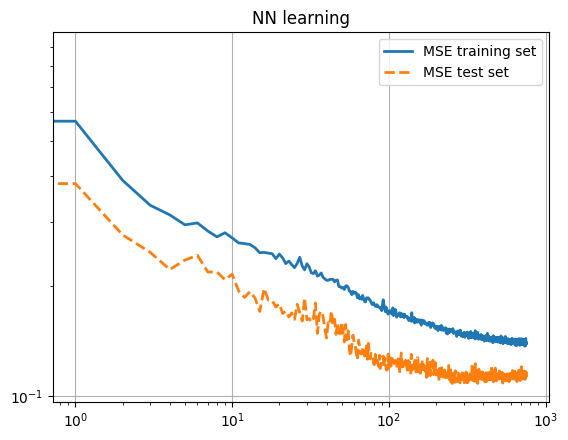

In [45]:
bc     = history.history['mean_squared_error']
val_bc = history.history['val_mean_squared_error']

plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2,)
plt.loglog(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
plt.title('NN learning')
plt.grid(True)

plt.legend(('MSE training set','MSE test set'))
plt.show()

7/7 [==============================] - 2s 190ms/step


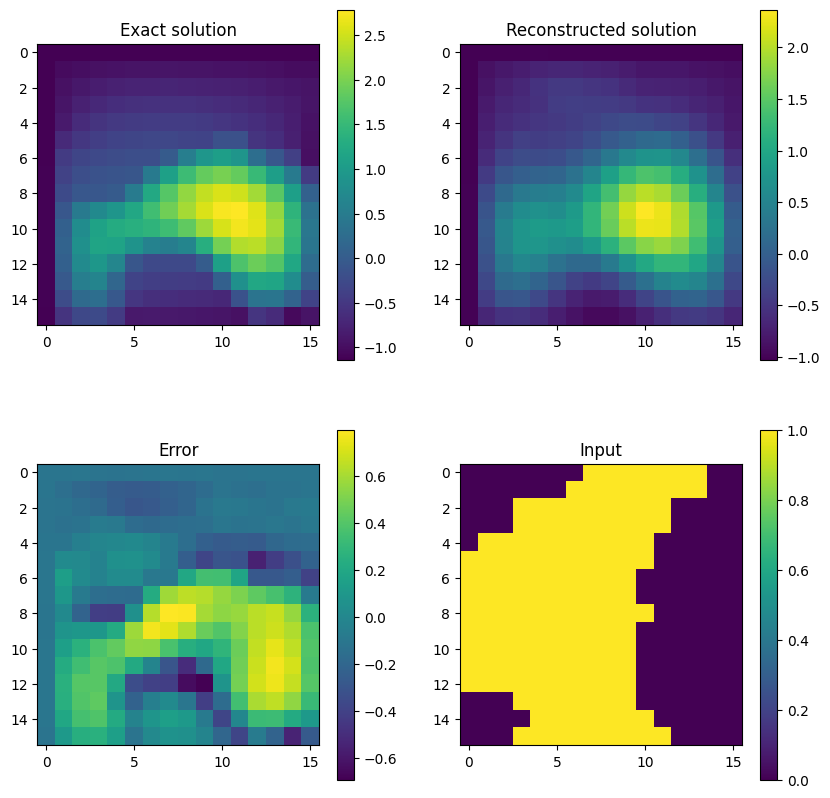

In [46]:
rec_output = model.predict(input_test)
index = 10

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(2, 2, 1)
ax.set_title('Exact solution')
m = ax.imshow(output_test[index])
fig.colorbar(m, ax=ax, location='right')

ax = fig.add_subplot(2, 2, 2)
ax.set_title('Reconstructed solution')
m = ax.imshow(rec_output[index])
fig.colorbar(m, ax=ax, location='right')

ax = fig.add_subplot(2, 2, 3)
ax.set_title('Error')
m = ax.imshow(output_test[index]-rec_output[index])
fig.colorbar(m, ax=ax, location='right')

ax = fig.add_subplot(2, 2, 4)
ax.set_title('Input')
m = ax.imshow(input_train[index])
fig.colorbar(m, ax=ax, location='right')

In [40]:
folder = 'Darcy'
save_NN = False
# save_NN = True
if save_NN:
    model.save('../data/'+folder+'/model_NN.h5')
    print('NN saved in '+str(folder))

NN saved in Darcy


FNO per Burger

In [32]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.01,    #0.05               best with 0.001
  decay_steps=100, #100        best with 100
  decay_rate=1, #1              best with 1
  staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_error', patience=500, min_delta=0.0001),
        ]

def compile_and_fit(model, name, x_train, y_train, x_test, y_test, optimizer=None, max_epochs=1000):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[
                  tf.keras.losses.MeanSquaredError("auto", "mean_squared_error"),
                  'accuracy'])

    model.summary()

    history = model.fit(
            x_train, y_train,
            epochs=max_epochs,
            validation_data=(x_test, y_test),
            callbacks=get_callbacks(name),
            verbose=2)

    return history


#Training data set
folder = 'Burgers_time'

input_train=np.load('../data/' + folder + '/input_train.npy')
input_test=np.load('../data/' + folder + '/input_test.npy')
output_train=np.load('../data/' + folder + '/output_train.npy')
output_test=np.load('../data/' + folder + '/output_test.npy')

# For Burgers
INPUTDIM = (input_train.shape[1],)
OUTPUTDIM = (output_train.shape[1],)


model = lb.FNO(INPUTDIM, OUTPUTDIM, p_dim=100, n=3, k_max=3, verbose=True, model_name='Darcy_FNO', dropout=0.1, kernel_reg=0.0)
history = compile_and_fit(model, model.name, x_train=input_train, y_train=output_train, x_test=input_test, y_test=output_test, optimizer=None, max_epochs=5000)

Creating Fourier Layer 0
fft_shape set: 3
ifft_shape set: 4
Bias layer has shape: 4
Creating Fourier Layer 1
fft_shape set: 3
ifft_shape set: 4
Bias layer has shape: 4
Creating Fourier Layer 2
fft_shape set: 3
ifft_shape set: 4
Bias layer has shape: 4
-------------------------------------------------------
Model: "Darcy_FNO"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 65)]              0         
                                                                 
 P_layer (Dense)             (None, 100)               6600      
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 fourier_layer_0 (Fourier_La  (None, 4)                409       
 yer)                                                            
             

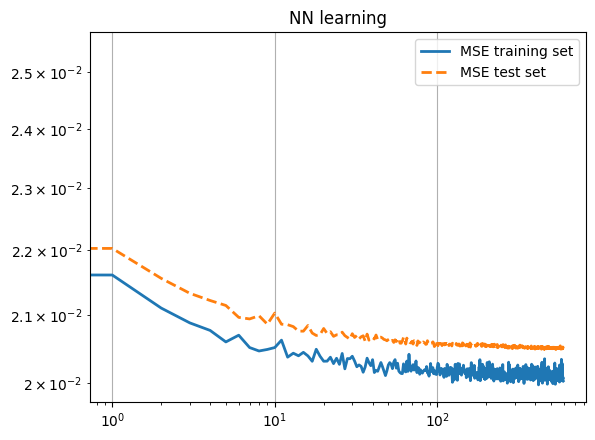

In [33]:
bc     = history.history['mean_squared_error']
val_bc = history.history['val_mean_squared_error']

plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2,)
plt.loglog(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
plt.title('NN learning')
plt.grid(True)

plt.legend(('MSE training set','MSE test set'))
plt.show()

51/51 [==============================] - 0s 4ms/step


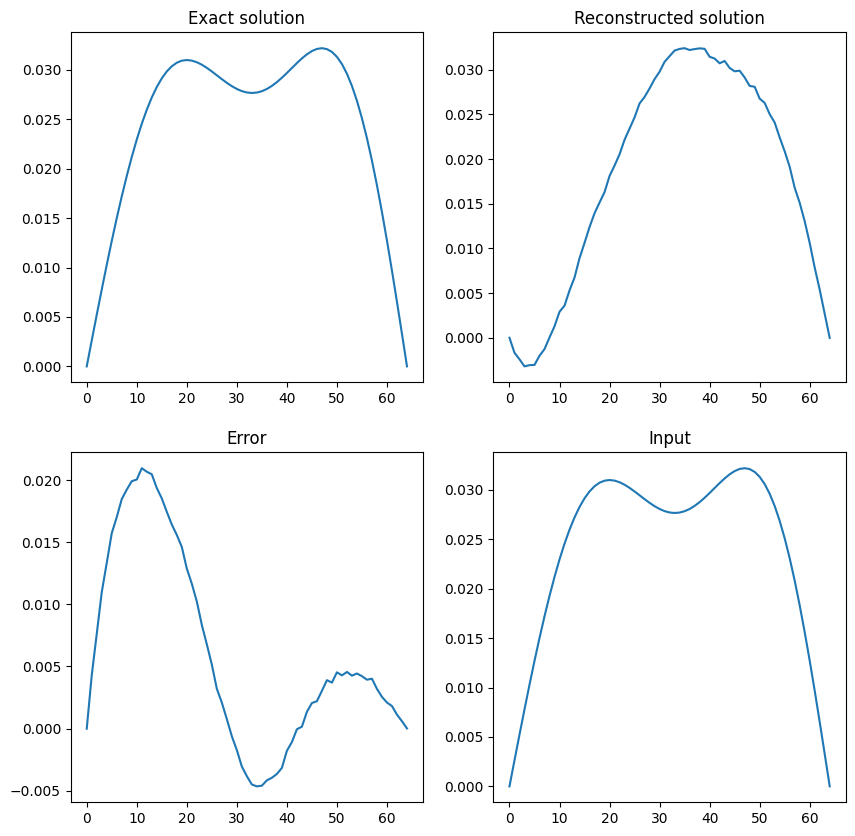

In [34]:
rec_output = model.predict(input_test)
index = 64

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(2, 2, 1)
ax.set_title('Exact solution')
m = ax.plot(output_test[index])

ax = fig.add_subplot(2, 2, 2)
ax.set_title('Reconstructed solution')
m = ax.plot(rec_output[index])

ax = fig.add_subplot(2, 2, 3)
ax.set_title('Error')
m = ax.plot(output_test[index]-rec_output[index])

ax = fig.add_subplot(2, 2, 4)
ax.set_title('Input')
m = ax.plot(input_test[index])

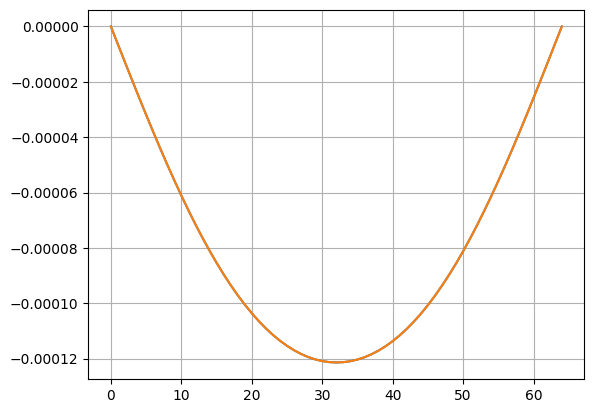

In [9]:
index = 10
plt.figure()
plt.grid(True)
plt.plot(input_test[index])
plt.plot(output_test[index])

In [ ]:
save_NN = False
# save_NN = True
if save_NN:
    model.save('../data/'+folder+'/model_NN.h5')
    print('NN saved in '+str(folder))

Prova Burger con FNO in EnKF

In [21]:
def compute_ex_sol(u0):
    Nx = 2**6
    Nt = 2**17
    dx = 1/Nx
    dt = 1/Nt
    xx = np.arange(0,1+dx,dx)
    tt = np.arange(0,1+dt,dt)
    nu = 0.1
    uh = np.zeros((xx.shape[0],tt.shape[0]))
    uh[:,0] = u0
    for j in range(0, tt.shape[0]-1):
        for i in range(1, xx.shape[0]-1):
            uh[i,j+1] = uh[i,j] + nu*dt*(uh[i+1,j] - 2*uh[i,j] + uh[i-1,j])/(dx**2) - 0.5*dt*(uh[i,j]**2-uh[i-1,j]**2)/dx
    return uh

In [ ]:
folder = 'Burgers_time'
T = 1
Nt = 100
dt = T/Nt
Nx = 2**6
dx = 1/Nx
xx = np.arange(0,1+dx,dx)
dim = Nx+1
k = 1
phi = 0

# Define the measurament function
def hx(x):
   return np.eye(dim)

# Define the transition function
NN=keras.models.load_model('../data/' + folder +'/model_NN.h5', compile=False)
def fxx(x):
    x_ = np.empty((1,dim,))
    x_[0,:] = x
    return NN(x_)

# Assign the initial x array
u0 = np.sin(k*np.pi*xx + phi)
u = u0

# Define the covariance matrix
P = np.eye(dim)
# Define the measurament noise
R = np.eye(dim)
# Define the process noise
Q = Q_discrete_white_noise(dim=dim, dt=dt, var=.01)

# Exact solution
u_ex = compute_ex_sol(u0)

# Define the data acquisition function
def get_sensor_reading(t):
    rel_index = t/Nt
    index = (int(u_ex.shape[1]-1)*rel_index)
    return u_ex[:,index]

# Create the model from library
f = lb.EnKF(dim_x=dim, dim_z=dim, f=fxx, h=hx, get_data=get_sensor_reading, dt=dt, t0=0)
f.create_model(x0=u0, P=P, R=R, Q=Q, N=20)

# Predict/Update loop
u_hat = f.loop(T, verbose=True)

plt.figure()
plt.grid(True)
for k in range(Nx+1):
    plt.plot(tt,u_hat[k,:], label='estiamted component '+str(k))
    plt.plot(tt,u_ex[k,0], label='exact component '+str(k), linestyle='--')
plt.legend()
plt.ylabel('Prey and Predators [-]')
plt.xlabel('Time [-]')